<a href="https://colab.research.google.com/github/FathimaThan/Disaster_Tweets_Classification_NLP/blob/main/nlp_with_disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
train_df[train_df['target']==0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


# Exploratory Data Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [ ]:
train_df.describe(include = object).transpose()

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


In [ ]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [ ]:
# Fill missing keywords with a placeholder 'no_keyword'
train_df['keyword'].fillna('no_keyword', inplace=True)
test_df['keyword'].fillna('no_keyword', inplace=True)

# Fill missing locations with a placeholder 'no_location'
train_df['location'].fillna('no_location', inplace=True)
test_df['location'].fillna('no_location', inplace=True)

# Check to ensure no more missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64
id          0
keyword     0
location    0
text        0
dtype: int64


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.shape

(7613, 5)

<Axes: xlabel='target'>

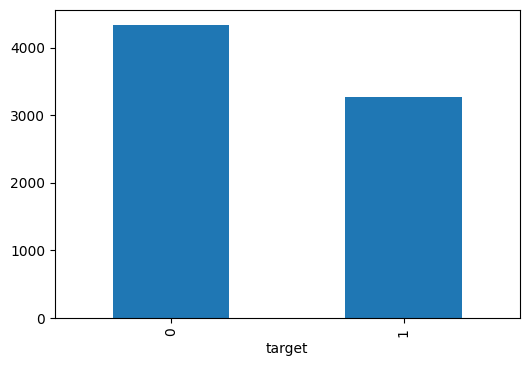

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
train_df['target'].value_counts().plot(kind='bar')

In [ ]:
# number of characters in each meassage
train_df["num_characters"] = train_df["text"].apply(len)
train_df

,id,keyword,location,text,target,num_characters
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1,137


# Preprocessing

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Apply preprocessing to the 'text' column of train df
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

In [ ]:
train_df

,id,keyword,location,text,target,num_characters,cleaned_text
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfire evacuation order...
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1,83,two giant crane holding bridge collapse nearby...
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1,125,ariaahrary thetawniest control wild fire calif...
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1,137,police investigating ebike collided car little...


In [ ]:
# Apply preprocessing to the 'text' column of test df
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

In [ ]:
# Create feature matrix X and target vector y
X = train_df['cleaned_text']
y = train_df['target']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['cleaned_text'])
y = train_df['target']

In [ ]:
X_test = vectorizer.transform(test_df["cleaned_text"])

# Splitting into Training and Validation Data

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print('Accuracy score: ', accuracy)
print('\nClassification report: \n', classification_rep)

Accuracy score:  0.7393302692055155

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       874
           1       0.71      0.67      0.69       649

    accuracy                           0.74      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523



Text(45.72222222222221, 0.5, 'True label')

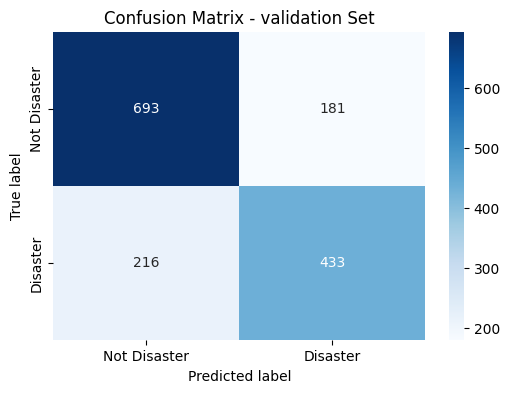

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["Not Disaster", "Disaster"], yticklabels = ["Not Disaster", "Disaster"])
plt.title("Confusion Matrix - validation Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

In [ ]:
accuracy_rf = accuracy_score(y_val, y_pred_rf)
classification_rep_rf = classification_report(y_val, y_pred_rf)

print("Random Forest Classifier Performance:")
print(f'Accuracy: {accuracy_rf:.2f}')
print("\nClassification Report:\n", classification_rep_rf)

Random Forest Classifier Performance:
Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       874
           1       0.81      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



Text(45.72222222222221, 0.5, 'True label')

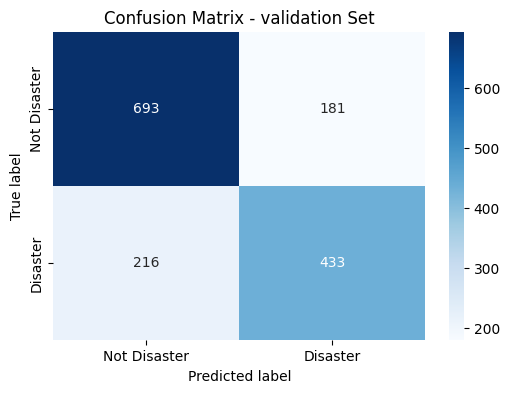

In [ ]:
conf_matrix_rf = confusion_matrix(y_val, y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_rf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["Not Disaster", "Disaster"], yticklabels = ["Not Disaster", "Disaster"])
plt.title("Confusion Matrix - validation Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_val)

In [ ]:
# Evaluate the performance
accuracy_svm = accuracy_score(y_val, y_pred_svm)
classification_rep_svm = classification_report(y_val, y_pred_svm)

# Print the results
print("SVM Classifier Performance:")
print(f'Accuracy: {accuracy_svm:.2f}')
print("\nClassification Report:\n", classification_rep_svm)

SVM Classifier Performance:
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



Text(45.72222222222221, 0.5, 'True label')

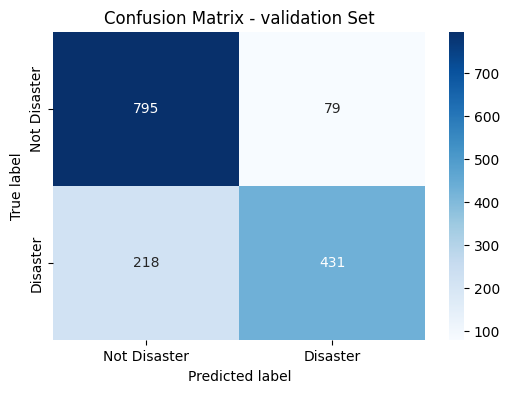

In [ ]:
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)

plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["Not Disaster", "Disaster"], yticklabels = ["Not Disaster", "Disaster"])
plt.title("Confusion Matrix - validation Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(),
}

# Initialize an empty DataFrame to store model-wise evaluations
evaluation_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Evaluate each classification model
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    # Append evaluation results to a temporary DataFrame
    temp_df = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc]
    })

    # Concatenate the temporary DataFrame to the main evaluation DataFrame
    evaluation_df = pd.concat([evaluation_df, temp_df], ignore_index=True)

# Display model-wise evaluations
print(evaluation_df)

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating Support Vector Machine...
                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     Logistic Regression  0.793828   0.790295  0.702619  0.743883  0.782088
1           Random Forest  0.781353   0.816000  0.628659  0.710183  0.761698
2       Gradient Boosting  0.737360   0.832000  0.480740  0.609375  0.704329
3                AdaBoost  0.745896   0.762000  0.587057  0.663185  0.725451
4  Support Vector Machine  0.804990   0.845098  0.664099  0.743745  0.786855


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [ ]:
# Instantiate the SVM classifier
svm = SVC()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# Evaluate the best model
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_val, y_val)
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy: 0.8003939592908733


In [ ]:
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
# Instantiate the Random Forest model with the best hyperparameters
best_svc_model = SVC(C=best_params['C'],
                                       gamma=best_params['gamma'],
                                       kernel=best_params['kernel'],random_state = 42)

# Train the model on the training data
best_svc_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [ ]:
# Make predictions on the validation set
y_pred_svm = best_svc_model.predict(X_val)

# Model Evaluation

In [ ]:
# Evaluate the performance
accuracy_svm = accuracy_score(y_val, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
classification_rep_svm = classification_report(y_val, y_pred_svm)

# Print the results
print("SVM Classifier Performance:")
print(f'Accuracy: {accuracy_svm:.2f}')
print("\nClassification Report:\n", classification_rep_svm)

SVM Classifier Performance:
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



Text(45.72222222222221, 0.5, 'True label')

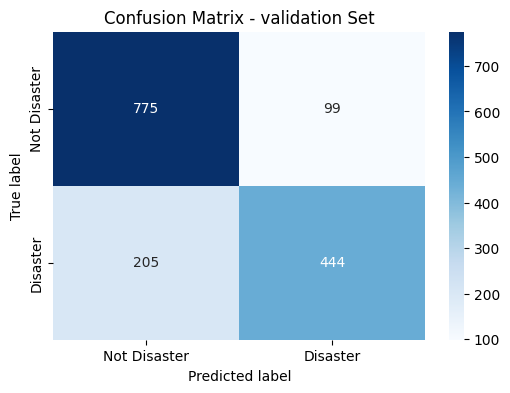

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["Not Disaster", "Disaster"], yticklabels = ["Not Disaster", "Disaster"])
plt.title("Confusion Matrix - validation Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [ ]:
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


# Predicting the Test Dataset

In [ ]:
sample_submission['target'] = best_svc_model.predict(X_test)

In [ ]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
sample_submission.to_csv("submission.csv", index=False)